# Imports

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import pandas as pd
import numpy as np

from pipeline_utils import *
from dataprep import *
from global_var import *
from sklearn.model_selection import train_test_split

Dataset shape: (324, 7)

Data types:
Query              object
File               object
Frequency         float64
Nbitems             int64
Nbtransactions      int64
Density           float64
Class               int64
dtype: object

Summary statistics:
        Frequency      Nbitems  Nbtransactions     Density       Class
count  324.000000   324.000000      324.000000  324.000000  324.000000
mean     0.500000  1385.777778    14627.777778    0.330203    0.537037
std      0.223953  3060.491229    23904.063658    0.205084    0.499398
min      0.200000     5.000000        5.000000    0.003712    0.000000
25%      0.350000    75.000000      296.000000    0.187500    0.000000
50%      0.500000    95.000000     2464.000000    0.333333    1.000000
75%      0.650000   129.000000     8124.000000    0.473684    1.000000
max      0.800000  9839.000000    67557.000000    0.640000    1.000000

Missing values:
Query             0
File              0
Frequency         0
Nbitems           0
Nbtransact

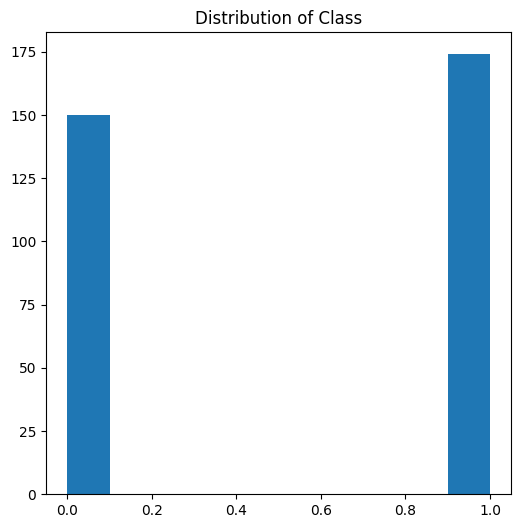

In [17]:
df = pd.read_csv(f"{DATASETS_FOLDER}/classes.csv")
X, y, numeric_features, categorical_features = columns_preparation(df, save=True)


In [19]:
numeric_features.pop()

'Class'

In [21]:

# Pipeline preparation
save = True
if save: 
    os.makedirs(name=f"{SAVED_PIPELINE_FOLDER}/{V_PIPELINE}/", exist_ok=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
pipeline = init_pipeline(numeric_features=numeric_features, categorical_features=categorical_features)


In [22]:

fit(X_train, y_train, pipeline) # Training


Fitting 5 folds for each of 24 candidates, totalling 120 fits



Model Evaluation:
Accuracy: 0.8615384615384616

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.91      0.83      0.87        35

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.87      0.86      0.86        65



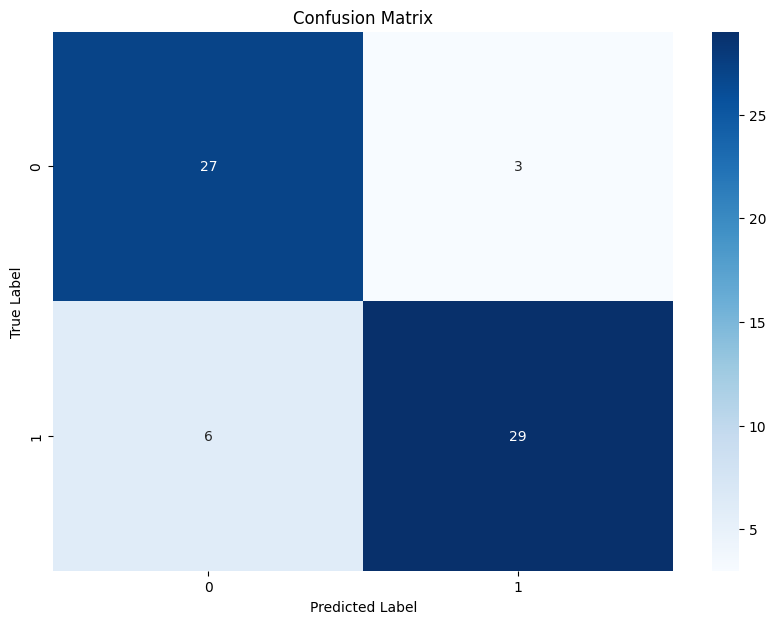

In [30]:

# Evaluation
evaluate(X_test, y_test, pipeline, save)


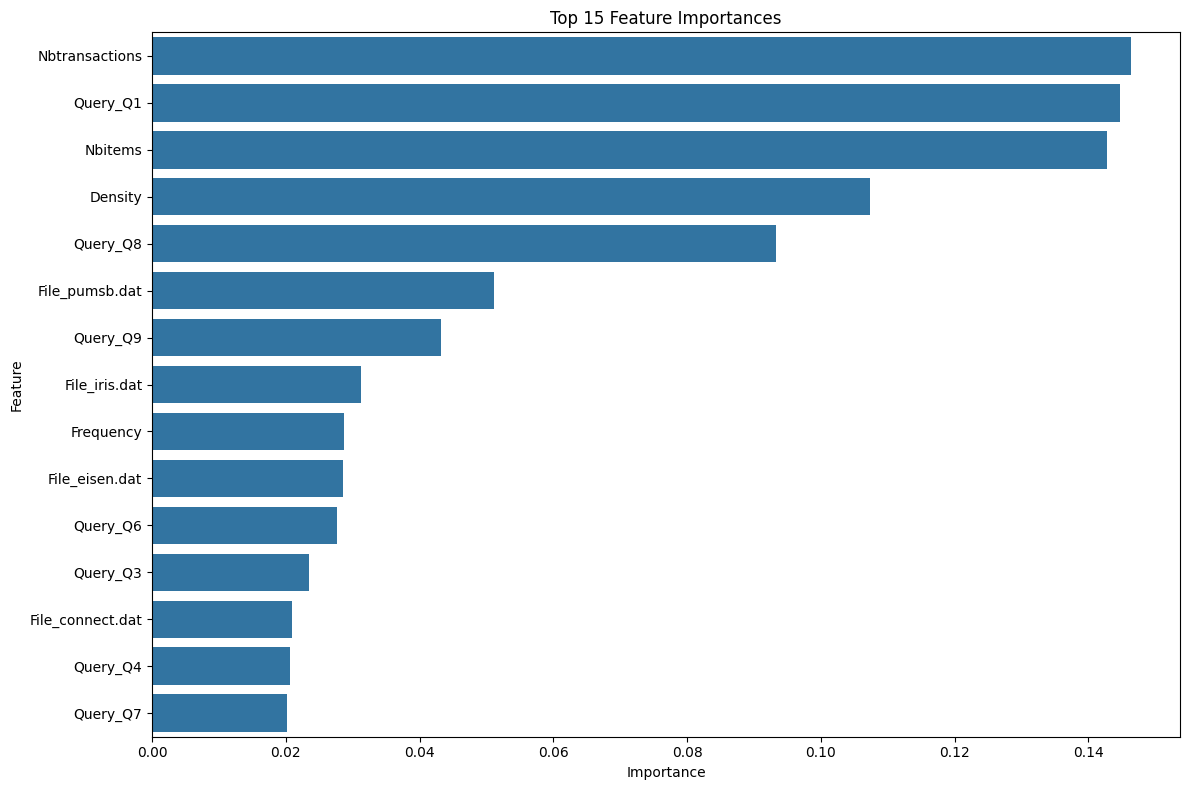

In [31]:

plot_feature_importances(pipeline.best_estimator_, numeric_features, categorical_features, X_train, save)

# Saving pipeline
if save:
    joblib.dump(pipeline, f"{SAVED_PIPELINE_FOLDER}/{V_PIPELINE}/pipeline.pkl")
    
